In [1]:
%matplotlib inline

In [25]:
import Signal
import random
import matplotlib.pyplot as plt
import math
import numpy
from scipy.signal import freqz
from scipy.signal import butter, lfilter

## Generate Signal

In [119]:
def graph_signals(time_axis, array, signalNum=0, timestart = 13.33, dur=0.3, sr=1000):
    timeIdx = int(timestart*sr)
    durIdx = int(dur*sr)
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(time_axis[timeIdx:timeIdx + durIdx], array[signalNum][timeIdx:timeIdx+durIdx],'b-')
    plt.xlabel('Time (ms)')
    plt.ylabel('Charge (arbitrary)')
    plt.show()
    signals = []
    for signal in array:
        signals.append((time_axis[timeIdx:timeIdx + durIdx], signal[timeIdx:timeIdx+durIdx]))
    return signals

In [117]:
random.seed(1)
d = 20 #m
angle = 1.8 #rad
coords = [[0.005, 0.005], [0.005, -0.005], [-0.005, -0.005], [-0.005, 0.005]]
freq = 45 #kHz
sos = 1.5 #m/ms (MAY NEED TO BE CALIBRATED)
sr = 1000 #kHz
read = 1500 #ms
noise = 0.5 #standard deviation
time_on = 100 #ms --ping duration
ping_period = 1000 #ms
ping_start = 0

#create an array containing the simulated readings arrays of each sensor
signals = []
for i in range(len(coords)):
    signals.append(Signal.Signal(d, angle, coords[i], freq, sos, sr, read, noise, time_on, ping_period, ping_start).signals)
times = numpy.arange(0, read, 1/sr)

13.330845116041766
13.33733706463199
13.335822752725283
13.32933006660101


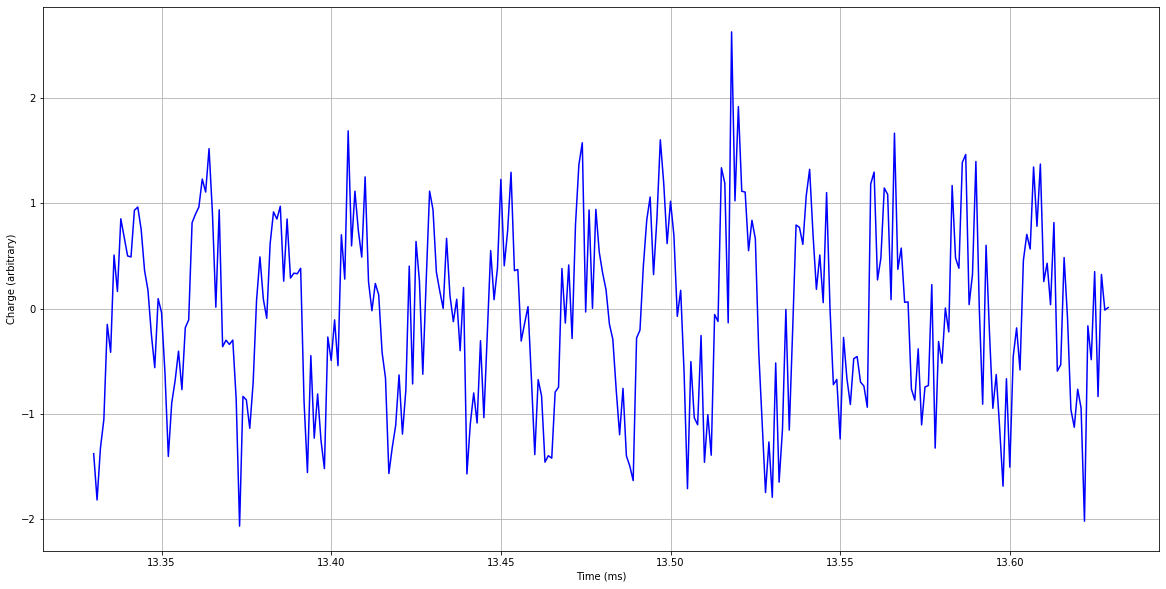

In [120]:
signals = graph_signals(times, signals)

## Signal Processing

In [121]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [122]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [129]:
def bandpassFilter(signals):
    filtered_signals = []
    for signal in signals:
        diff = freq*.1
        lowcut = (freq-diff)*1000
        highcut = (freq+diff)*1000
        t = signal[0]
        y = butter_bandpass_filter(signal[1], lowcut, highcut, sr*1000, order=2)
        filtered_signals.append((t,y))
    return filtered_signals

In [130]:
filtered_signals = bandpassFilter(signals)

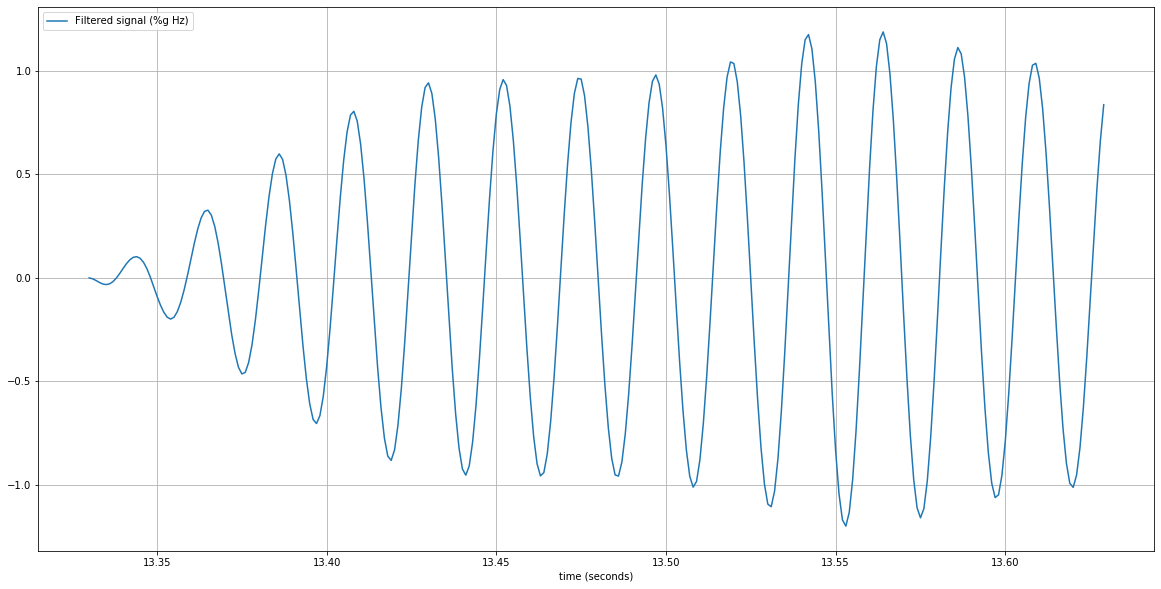

In [136]:
plt.figure(figsize = (20,10))
plt.plot(filtered_signals[0][0], filtered_signals[0][1], label='Filtered signal (%g Hz)')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

## MUSIC Algorithm

In [ ]:
Rx=1/N sum (i=1 to N) X(i) X^H(i)